In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SeparableConv2D,BatchNormalization, Conv2D, MaxPooling2D


In [2]:
!pip install matplotlib

     ---------------------------------------- 0.0/162.8 kB ? eta -:--:--
     ------- ------------------------------- 30.7/162.8 kB 1.3 MB/s eta 0:00:01
     -------------------------------------- 162.8/162.8 kB 2.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/7.7 MB ? eta -:--:--
   - -------------------------------------- 0.3/7.7 MB 9.6 MB/s eta 0:00:01
   --- ------------------------------------ 0.7/7.7 MB 8.9 MB/s eta 0:00:01
   ---- ----------------------------------- 0.9/7.7 MB 7.0 MB/s eta 0:00:01
   ----- ---------------------------------- 1.1/7.7 MB 6.2 MB/s eta 0:00:02
   ----- ---------------------------------- 1.1/7.7 MB 6.1 MB/s eta 0:00:02
   ----- ---------------------------------- 1.1/7.7 MB 6.1 MB/s eta 0:00:02
   ------ --------------------------------- 1.2/7.7 MB 3.7 MB/s eta 0:00:02
   --------- ------------------------------ 1.8/7.7 MB 5.0 MB/s eta 0:00:02
   ---------- ----------------------------- 2.0/7.7 MB 4.9 MB/s eta 0:00:02
   -----------


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [15]:
# Dataset generation
from keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Optimizer
from keras.optimizers import Adam
# Keras layers
from keras.layers import Input, Dense, Dropout, Flatten, AveragePooling2D
# Keras model
from keras.models import Model

In [17]:
classes = []
class_counter = 0

for dirname, _, filenames in os.walk('C:\\Users\\sahil\\Desktop\\majorProject\\CNN\\dataset\\train\\'):
    if dirname.endswith('\\'):
        continue
    else:
        classes.append({dirname.split('\\')[-1]: 0})
    file_count = 0
    for filename in filenames:
        file_count += 1
    classes[class_counter][dirname.split('\\')[-1]] = file_count
    class_counter += 1
    
print('{:<15} {:<15}'.format('Class', 'Number of instances'))
print()
for d in classes:
    [(k, v)] = d.items()
    print('{:<15} {:<15}'.format(k, v))

Class           Number of instances

freshapples     1693           
freshbanana     1581           
freshoranges    1466           
rottenapples    2342           
rottenbanana    2224           
rottenoranges   1595           


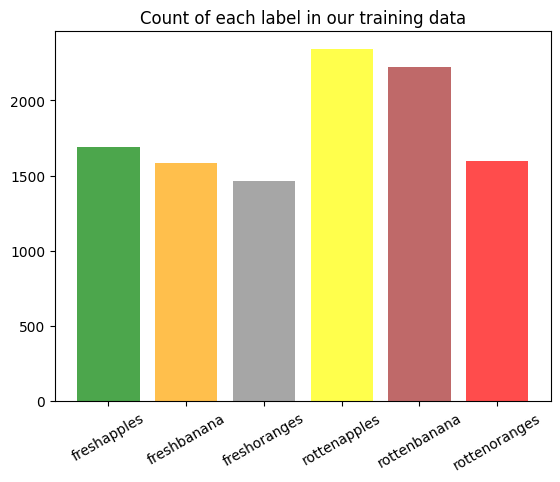

In [18]:
counts = []
labels = []
for d in classes:
    [(k, v)] = d.items()
    labels.append(k)
    counts.append(v)

plt.figure()
plt.bar(range(len(counts)), counts, color = ['green', 'orange', 'grey', 'yellow', 'brown', 'red'], alpha = .7)
plt.xticks(range(len(counts)), labels, rotation = 30)
plt.title('Count of each label in our training data')
plt.show()

In [21]:
TRAIN_PATH = 'C:\\Users\\sahil\\Desktop\\majorProject\\CNN\\dataset\\train'
TEST_PATH = 'C:\\Users\\sahil\\Desktop\\majorProject\\CNN\\dataset\\test'

In [22]:
datagen = ImageDataGenerator(
    rotation_range = 30, 
    zoom_range = .3, 
    horizontal_flip = True, 
    vertical_flip = True, 
    validation_split = .3
)

train_ds = datagen.flow_from_directory(
    directory = TRAIN_PATH,
    target_size = (224, 224),
    color_mode = 'rgb',
    class_mode = 'categorical',
    subset = 'training'
)

validation_ds = datagen.flow_from_directory(
    directory = TRAIN_PATH,
    target_size = (224, 224),
    color_mode = 'rgb',
    class_mode = 'categorical',
    subset = 'validation'
)

Found 7634 images belonging to 6 classes.
Found 3267 images belonging to 6 classes.


In [10]:
from keras.layers import Input

model = Sequential()

model.add(Input(shape=(224,224,3)))
model.add(Conv2D(32, (3, 3), kernel_initializer='he_uniform', padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(SeparableConv2D(32, (3, 3), depthwise_initializer='he_uniform', pointwise_initializer='he_uniform', padding='same', activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(SeparableConv2D(64, (3, 3), depthwise_initializer='he_uniform', pointwise_initializer='he_uniform', padding='same', activation='relu'))
model.add(SeparableConv2D(64, (3, 3), depthwise_initializer='he_uniform', pointwise_initializer='he_uniform', padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(128, (3, 3), kernel_initializer='he_uniform', padding='same', activation='relu'))
model.add(Conv2D(128, (3, 3), kernel_initializer='he_uniform', padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.3))

model.add(Dense(1, activation='sigmoid'))
model.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 224, 224, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ separable_conv2d_2              │ (None, 224, 224, 32)   │         1,344 │
│ (SeparableConv2D)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 112, 112, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ separable_conv2d_3              │ (None, 112, 112, 64)   │         2,400 │
│ (SeparableConv2D)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ separable_conv2d_4              │ (None, 112, 112, 64)   │         4,736 │
│ (SeparableConv2D)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 56, 56, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 100352)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    12,845,184 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,077,153 (49.89 MB)

 Trainable params: 13,076,641 (49.88 MB)

 Non-trainable params: 512 (2.00 KB)

In [19]:
optimizer = Adam(learning_rate = 0.001)

model.compile(optimizer = optimizer, loss = 'categorical_crossentropy', metrics = ['accuracy'])

hist = model.fit(train_ds, validation_data = validation_ds, epochs = 8, batch_size = 32,verbose=1)

Epoch 1/8
239/239 ━━━━━━━━━━━━━━━━━━━━ 1519s 6s/step - accuracy: 0.8829 - loss: 0.5009 - val_accuracy: 0.9489 - val_loss: 0.1451
Epoch 2/8
239/239 ━━━━━━━━━━━━━━━━━━━━ 1549s 6s/step - accuracy: 0.9264 - loss: 0.2282 - val_accuracy: 0.9538 - val_loss: 0.1248
Epoch 3/8
239/239 ━━━━━━━━━━━━━━━━━━━━ 1572s 7s/step - accuracy: 0.9464 - loss: 0.1651 - val_accuracy: 0.9682 - val_loss: 0.0953
Epoch 4/8
239/239 ━━━━━━━━━━━━━━━━━━━━ 1545s 6s/step - accuracy: 0.9503 - loss: 0.1395 - val_accuracy: 0.9721 - val_loss: 0.0803
Epoch 5/8
239/239 ━━━━━━━━━━━━━━━━━━━━ 1538s 6s/step - accuracy: 0.9517 - loss: 0.1451 - val_accuracy: 0.9715 - val_loss: 0.0884
Epoch 6/8
239/239 ━━━━━━━━━━━━━━━━━━━━ 1562s 7s/step - accuracy: 0.9537 - loss: 0.1585 - val_accuracy: 0.9780 - val_loss: 0.0672
Epoch 7/8
239/239 ━━━━━━━━━━━━━━━━━━━━ 1545s 6s/step - accuracy: 0.9645 - loss: 0.1119 - val_accuracy: 0.9789 - val_loss: 0.0539
Epoch 8/8
239/239 ━━━━━━━━━━━━━━━━━━━━ 1528s 6s/step - accuracy: 0.9674 - loss: 0.0985 - val_accu

In [25]:
test_ds = image_dataset_from_directory(
    TEST_PATH,
    label_mode = 'categorical',
    color_mode = 'rgb',
    image_size = (244, 244)
)

Found 2698 files belonging to 6 classes.


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 945ms/step
['freshapples', 'freshbanana', 'freshoranges', 'rottenapples', 'rottenbanana', 'rottenoranges']


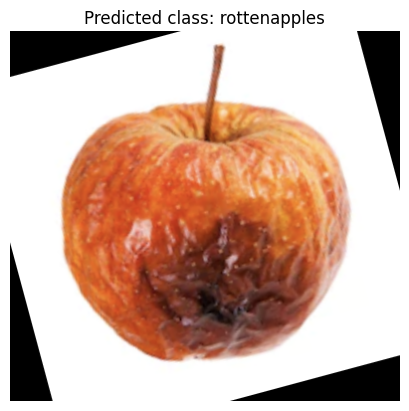

Predicted class: rottenapples
Predicted probabilities: [1.0309235e-04 7.1190653e-14 1.3984755e-10 9.9989665e-01 1.4190462e-07
 1.6478283e-07]


In [26]:
new_image_path = 'C:\\Users\\sahil\\Desktop\\majorProject\\CNN\\dataset\\test\\rottenapples\\rotated_by_15_Screen Shot 2018-06-07 at 2.19.37 PM.png'
new_model = tf.keras.models.load_model('cnn_model.keras')
from keras.preprocessing import image

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image  # Import the PIL library

# Load the new image and resize it
img = image.load_img(new_image_path, target_size=(224, 224))  # Resize to 224x224
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

# Make predictions
predictions =new_model.predict(img_array)

# Get the predicted class index
predicted_class_index = np.argmax(predictions)

# Get the class label
class_labels = list(train_ds.class_indices.keys())
predicted_class_label = class_labels[predicted_class_index]
print(class_labels)

# Display the image
img = mpimg.imread(new_image_path)
plt.imshow(img)
plt.axis('off')
plt.title(f'Predicted class: {predicted_class_label}')
plt.show()

# Print the results
print(f'Predicted class: {predicted_class_label}')
print(f'Predicted probabilities: {predictions[0]}')

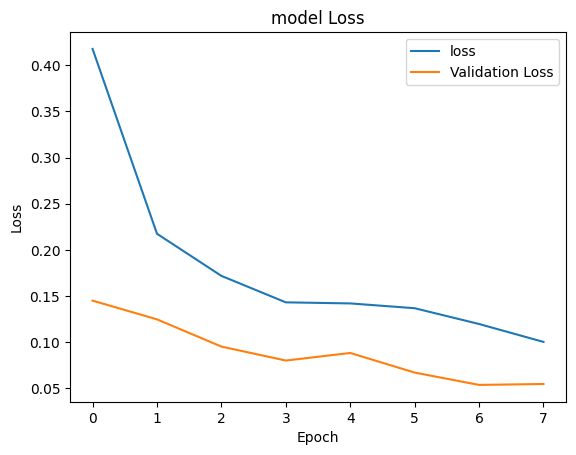

In [26]:
import matplotlib.pyplot as plt
 
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["loss","Validation Loss"])
plt.show()

In [28]:
from keras.preprocessing import image

# Load the test dataset
test_ds = image_dataset_from_directory(
    TEST_PATH,
    label_mode='categorical',
    color_mode='rgb',
    image_size=(224, 224)  # Resize to 224x224
)

# Evaluate the model on the test dataset
results = model.evaluate(test_ds)

# Print the results
print('{:<20} {:<20}'.format('Test loss', 'Test accuracy'))
print('{:<20} {:<20}'.format(np.round(results[0], 2), np.round(results[1], 2)))

Found 2698 files belonging to 6 classes.
85/85 ━━━━━━━━━━━━━━━━━━━━ 335s 4s/step - accuracy: 0.9775 - loss: 0.0633
Test loss            Test accuracy       
0.06                 0.98                


Found 2698 images belonging to 6 classes.
85/85 ━━━━━━━━━━━━━━━━━━━━ 366s 4s/step
Classification Report:
                precision    recall  f1-score   support

  freshapples       1.00      0.03      0.06       395
  freshbanana       0.97      0.56      0.71       381
 freshoranges       0.25      0.98      0.40       388
 rottenapples       0.88      0.16      0.27       601
 rottenbanana       0.82      0.98      0.90       530
rottenoranges       0.80      0.45      0.57       403

     accuracy                           0.52      2698
    macro avg       0.79      0.53      0.49      2698
 weighted avg       0.80      0.52      0.49      2698



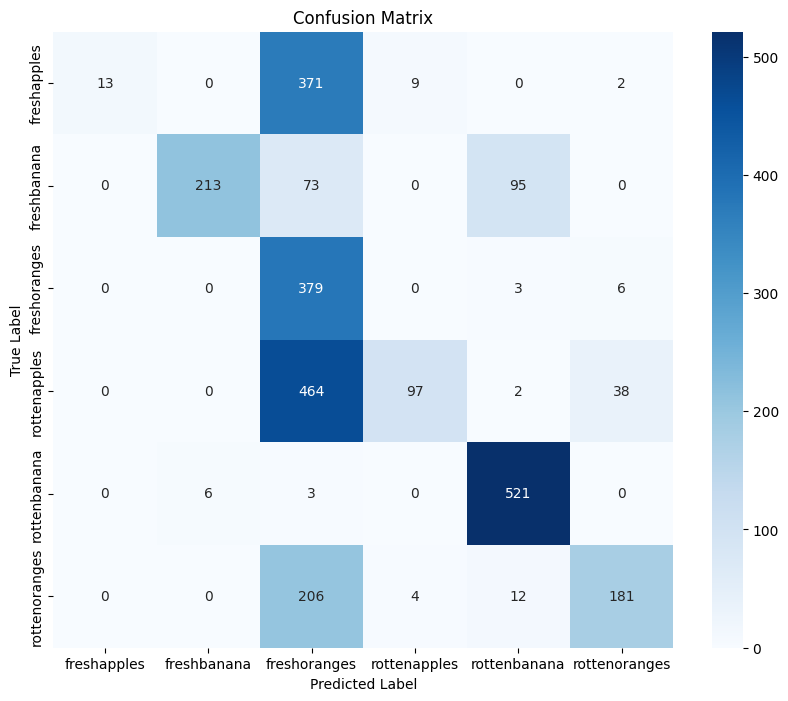

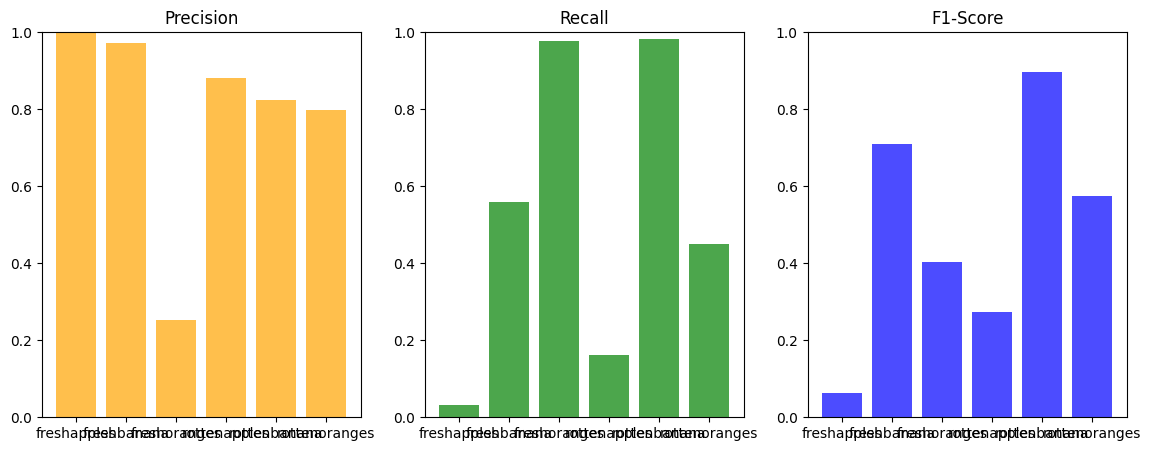

In [33]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
# Data preparation for test set
test_datagen = ImageDataGenerator(
    rescale=1./255
)

# Generate predictions for the entire test set
test_generator = test_datagen.flow_from_directory(
    directory=TEST_PATH,
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    shuffle=False
)

# Get true labels
true_labels = test_generator.classes

# Make predictions
predictions = model.predict(test_generator)

# Convert predictions to class labels
predicted_labels = np.argmax(predictions, axis=1)

# Create confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Display classification report
class_names = list(test_generator.class_indices.keys())
classification_rep = classification_report(true_labels, predicted_labels, target_names=class_names)
print("Classification Report:\n", classification_rep)

# Visualize confusion matrix using seaborn
plt.figure(figsize=(10, 8))

# Heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Visualize precision, recall, and F1-score
precision = np.diag(conf_matrix) / np.sum(conf_matrix, axis=0)
recall = np.diag(conf_matrix) / np.sum(conf_matrix, axis=1)
f1_score = 2 * (precision * recall) / (precision + recall)

# Bar plots
plt.figure(figsize=(14, 5))

plt.subplot(1, 3, 1)
plt.bar(class_names, precision, color='orange', alpha=0.7)
plt.title('Precision')
plt.ylim(0, 1)

plt.subplot(1, 3, 2)
plt.bar(class_names, recall, color='green', alpha=0.7)
plt.title('Recall')
plt.ylim(0, 1)

plt.subplot(1, 3, 3)
plt.bar(class_names, f1_score, color='blue', alpha=0.7)
plt.title('F1-Score')
plt.ylim(0, 1)

plt.show()

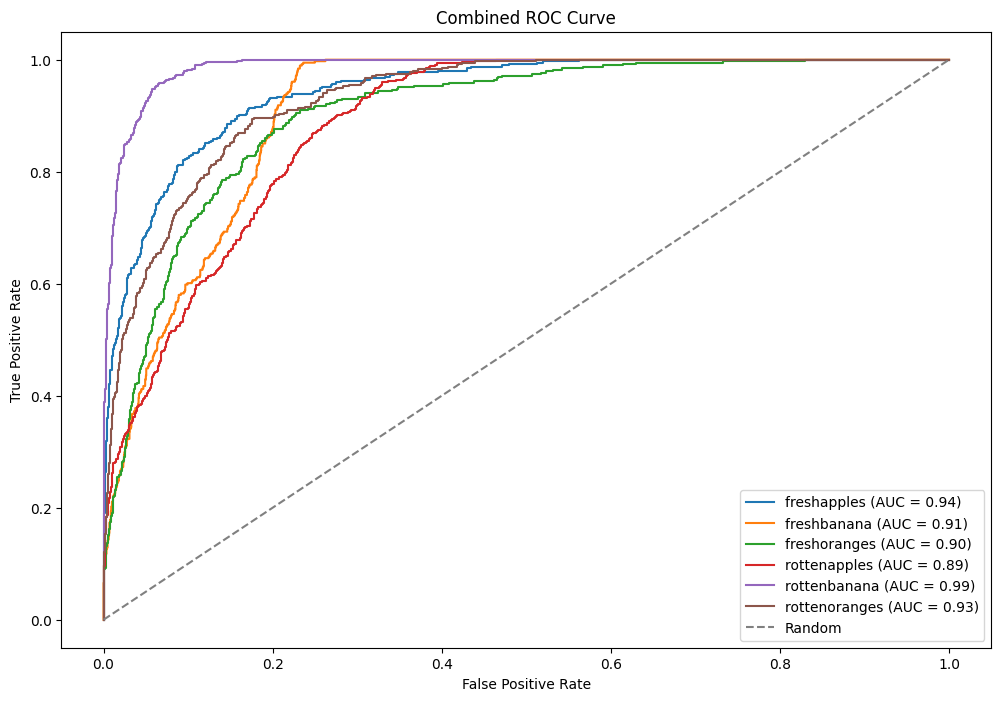

In [36]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

label_encoder = LabelEncoder()
true_labels_encoded = label_encoder.fit_transform(true_labels)
predicted_labels_encoded = label_encoder.transform(predicted_labels)

# ROC Curve
y_bin = label_binarize(true_labels_encoded, classes=np.unique(true_labels_encoded))
n_classes = len(class_names)

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], predictions[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(12, 8))

# Combined ROC Curve
for i in range(n_classes):
    ax.plot(fpr[i], tpr[i], label=f'{class_names[i]} (AUC = {roc_auc[i]:.2f})')

ax.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Combined ROC Curve')
ax.legend()

# Feature Importance (Assuming model has attribute `feature_importances_`)
if hasattr(model, 'feature_importances_'):
    feature_importance = model.feature_importances_
    features = range(len(feature_importance))

    # Create an inset axis for the feature importance bar plot
    inset_ax = fig.add_axes([0.6, 0.6, 0.25, 0.25])
    inset_ax.bar(features, feature_importance, color='teal', alpha=0.7)
    inset_ax.set_xlabel('Feature Index')
    inset_ax.set_ylabel('Importance')
    inset_ax.set_title('Feature Importance')

plt.show()


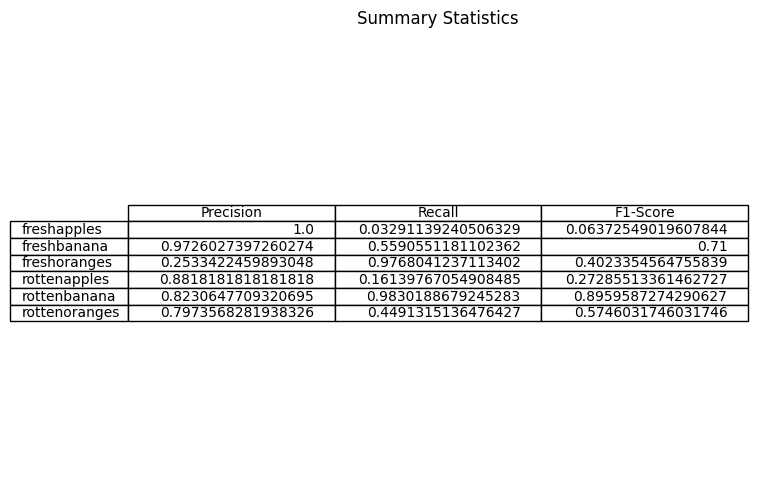

In [37]:
from sklearn.metrics import precision_recall_fscore_support

# Precision, Recall, F1-Score per Class
precision_per_class, recall_per_class, f1_score_per_class, _ = precision_recall_fscore_support(true_labels_encoded, predicted_labels_encoded, average=None)

# Set up the matplotlib figure
fig, axes = plt.subplots(figsize=(8, 6))

# Summary Statistics
summary_stats = pd.DataFrame({
    'Precision': precision_per_class,
    'Recall': recall_per_class,
    'F1-Score': f1_score_per_class
}, index=class_names)

axes.table(cellText=summary_stats.values, colLabels=summary_stats.columns, rowLabels=class_names, loc='center')
axes.axis('off')
axes.set_title('Summary Statistics')

plt.show()

In [38]:
model.save('cnn_model.h5')

In [39]:
model.save('cnn_model.keras')